In [1]:
#|default_exp app

In [2]:
#|export
from fastai.vision.all import *
import gradio as gr

def is_cat(x):
    return x[0].isupper()

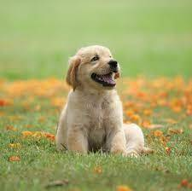

In [3]:
im = PILImage.create("dog1.jpg")
im.thumbnail((192, 192))
im

In [4]:
#|export
learn = load_learner("model.pkl")

In [5]:
learn.predict(im)

('False', TensorBase(0), TensorBase([1.0000e+00, 8.7832e-07]))

In [6]:
#|export
categories = ("Dog", "Cat")

def classify_image(img):
    pred, idx, probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))

In [7]:
classify_image(im)

{'Dog': 0.9999991655349731, 'Cat': 8.78320577157865e-07}

# Customizing Gradio app

In [8]:
#|export
title = "Cat or Dog Classifier"
description = "A Cat or Dog classifier trained on the Oxford Pets dataset with fastai. Created as a demo for Gradio and HuggingFace Spaces."
article="<p style='text-align: center'><a href='https://tmabraham.github.io/blog/gradio_hf_spaces_tutorial' target='_blank'>Blog post</a></p>"
interpretation='default'
enable_queue=True

In [9]:
#|export
image = gr.inputs.Image(shape=(192, 192))
label = gr.outputs.Label()
examples = ["dog1.jpg", "dog2.jpg", "dog3.jpg", "cat1.jpg", "cat2.jpg"]

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples, title=title, description=description, article=article, interpretation=interpretation, enable_queue=enable_queue)
intf.launch(inline=False)

/home/yehao_ubuntu/mambaforge/lib/python3.10/site-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/home/yehao_ubuntu/mambaforge/lib/python3.10/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/home/yehao_ubuntu/mambaforge/lib/python3.10/site-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/home/yehao_ubuntu/mambaforge/lib/python3.10/site-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)
/home/yehao_ubuntu/mambaforge/lib/python3.10/site-packages/gradio/deprecation.py:40: UserWarning: `enable_queue` is deprecated in `Interfa

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


# Export

In [10]:
import nbdev
nbdev.export.nb_export('app.ipynb', './')
print('Export successful')

Export successful
